# Loan Payback Prediction using Deep Learning

## The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal


Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off),  we will build a model that can predict whether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df_info=pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv')

In [105]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


## Exploratory Data Analysis

In this section we would be analysing the data and finding out patterns, which we could utilise in training our model.

In [106]:
df=pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [107]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [108]:
df['loan_status'].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

Hence loan_status column has 2 values: Fully Paid and Charged Off.

In [109]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

Lets first plot a **heatmap** indicating how the features are related to each other.

In [111]:
df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']].corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

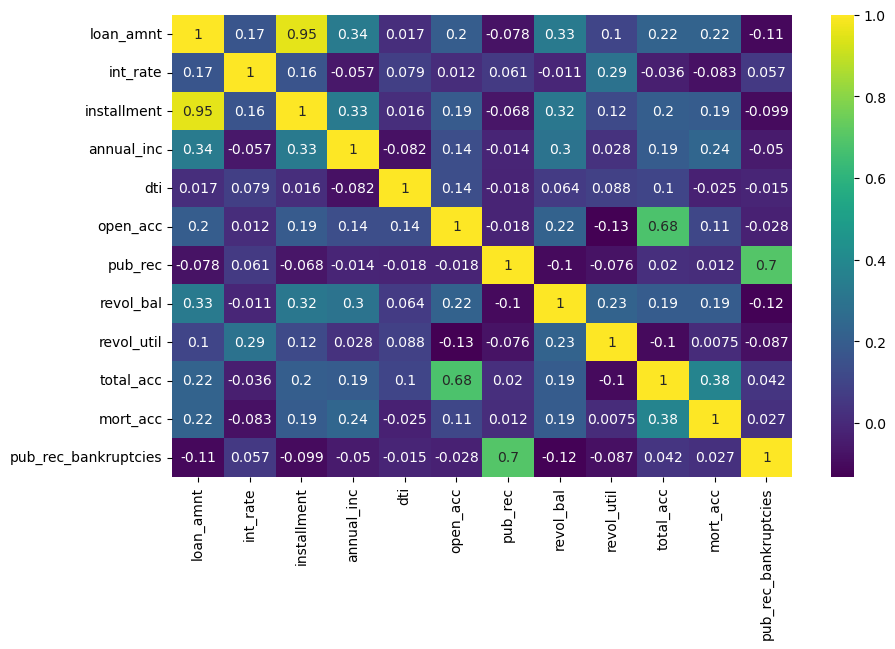

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']].corr(),cmap='viridis',annot=True)

**Heatmap** indicates existence of a very strong correlationship between number of **installments** and **loan_amnt**.

<Axes: xlabel='installment', ylabel='loan_amnt'>

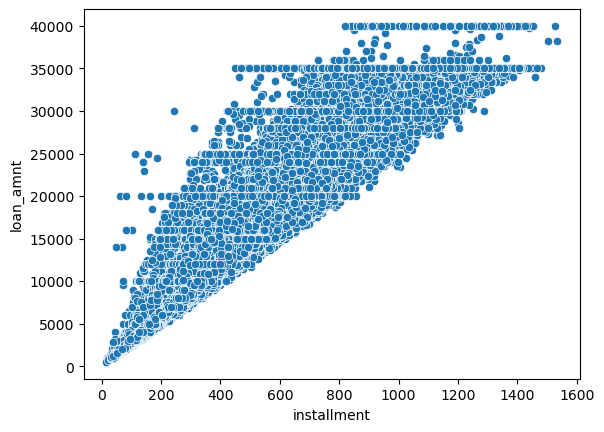

In [272]:
sns.scatterplot(df,x='installment',y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='count'>

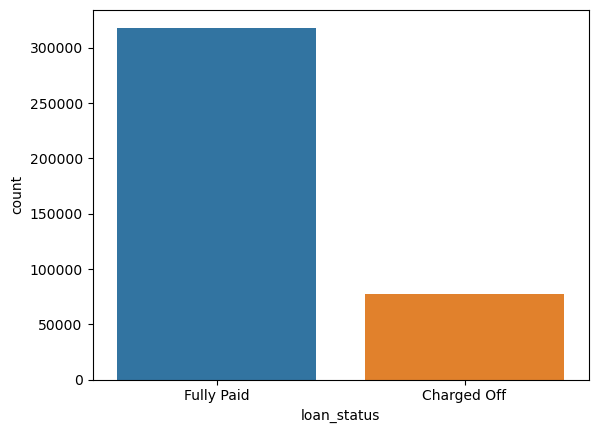

In [113]:
sns.countplot(df,x='loan_status')

Here we can see that people who fully pay back their loans are more than those who do not.

<Axes: xlabel='term', ylabel='count'>

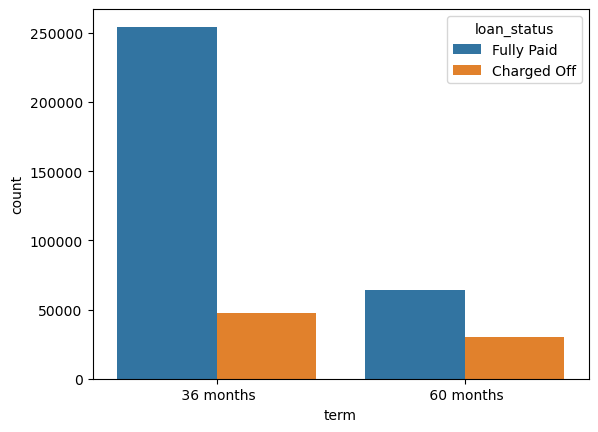

In [114]:
sns.countplot(df,x='term',hue="loan_status")

Here we see that when people borrow money for 60 terms they tend to not return it, more than 30 terms option.

<Axes: xlabel='home_ownership', ylabel='count'>

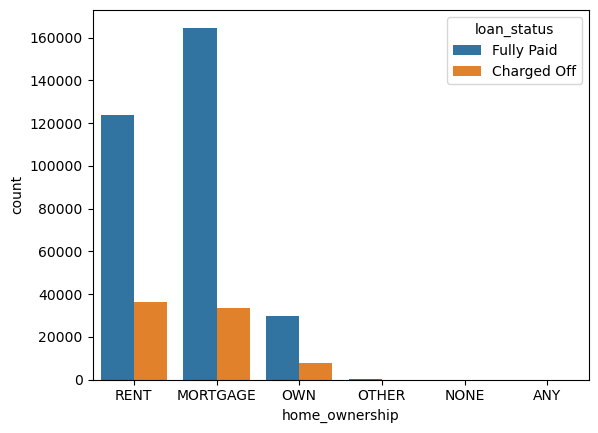

In [115]:
sns.countplot(df,x='home_ownership',hue="loan_status")

In [116]:
print(len(df.loc[df['home_ownership']=='RENT']))
print(len(df.loc[df['home_ownership']=='MORTGAGE']))
print(len(df.loc[df['home_ownership']=='OWN']))
print(len(df.loc[df['home_ownership']=='OTHER']))
print(len(df.loc[df['home_ownership']=='NONE']))
print(len(df.loc[df['home_ownership']=='ANY']))
print('\n')


print("Now the percentage of clients who dont pay back")
print('\n')

print((len(df.loc[(df['home_ownership']=='RENT')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='RENT']))
print((len(df.loc[(df['home_ownership']=='MORTGAGE')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='MORTGAGE']))
print((len(df.loc[(df['home_ownership']=='OWN')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='OWN']))
print((len(df.loc[(df['home_ownership']=='OTHER')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='OTHER']))
print((len(df.loc[(df['home_ownership']=='NONE')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='NONE']))
print((len(df.loc[(df['home_ownership']=='ANY')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['home_ownership']=='ANY']))






159790
198348
37746
112
31
3


Now the percentage of clients who dont pay back


22.662244195506602
16.956057031076693
20.680336989349865
14.285714285714286
22.580645161290324
0.0


We can see people who rent their houses tend not to pay back the loan

Since the **OTHER**, **NONE** and **ANY** options barely have data, we will club them together later.

<Axes: xlabel='loan_amnt', ylabel='Count'>

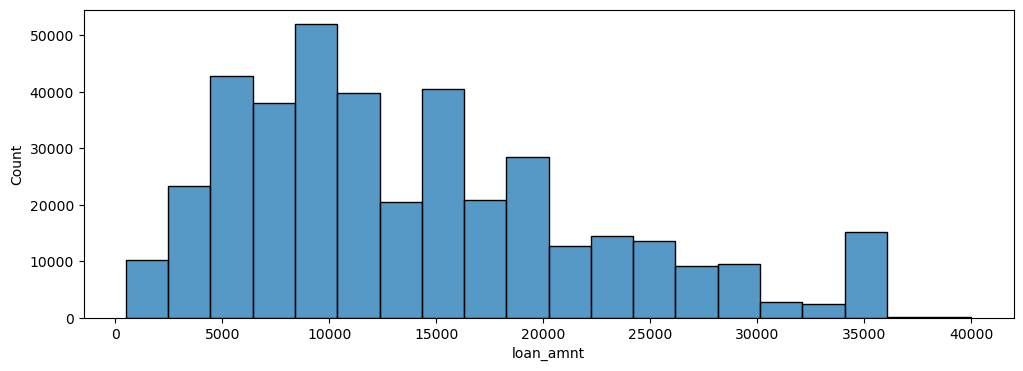

In [118]:
plt.figure(figsize=(12,4))
sns.histplot(df,x='loan_amnt',bins=20)

People tend to borrow the most money in the range +- 10000

### Exploring grades

<Axes: xlabel='grade', ylabel='count'>

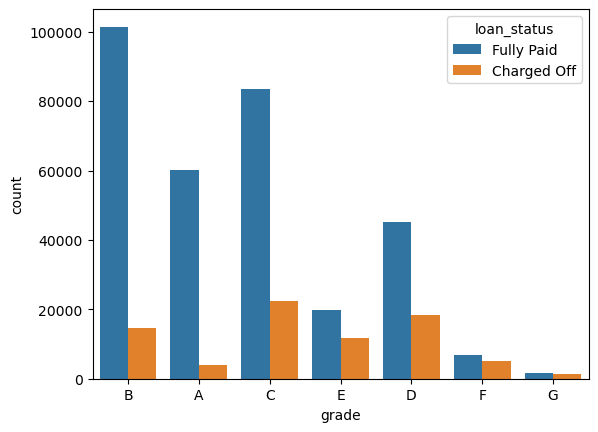

In [119]:
sns.countplot(df,x='grade',hue='loan_status')

People who borrow money from the F and G grade tend to not return them, the most

In [120]:
print((len(df.loc[(df['grade']=='A')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='A']))
print((len(df.loc[(df['grade']=='B')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='B']))
print((len(df.loc[(df['grade']=='C')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='C']))
print((len(df.loc[(df['grade']=='D')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='D']))
print((len(df.loc[(df['grade']=='E')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='E']))
print((len(df.loc[(df['grade']=='F')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='F']))
print((len(df.loc[(df['grade']=='G')& (df['loan_status']=='Charged Off')]))*100/len(df.loc[df['grade']=='G']))



6.28787760761525
12.573049009636435
21.180899544283733
28.86782948177067
37.36344004065041
42.78797145769623
47.83889980353634


Here we can see that around 50% of the people who borrow money from the F and G grades tend not to return the money.

<Axes: xlabel='sub_grade', ylabel='count'>

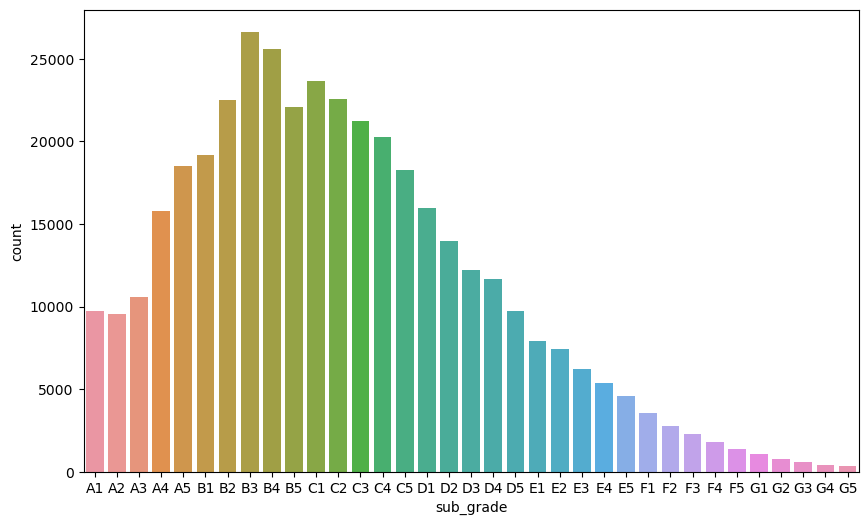

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(df,x='sub_grade',order=sorted(df['sub_grade'].unique()))

People borrow the most from the B3 grades, and it goes down progressively in either directions

<Axes: xlabel='sub_grade', ylabel='count'>

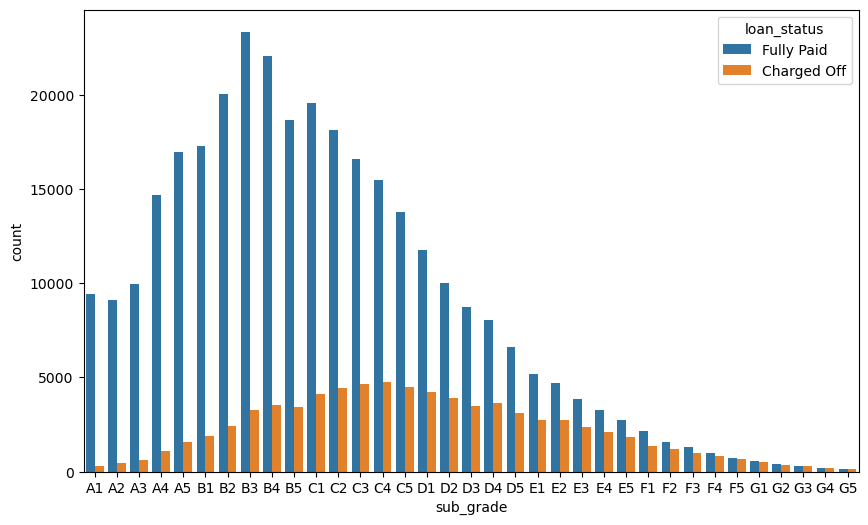

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(df,x='sub_grade',hue='loan_status',order=sorted(df['sub_grade'].unique()))

As we move towards **F** and **G** grades, the **Charged Off** percentage keeps getting higher, indicating low loan payback rate in the **F** and **G** grades.

<Axes: xlabel='sub_grade', ylabel='count'>

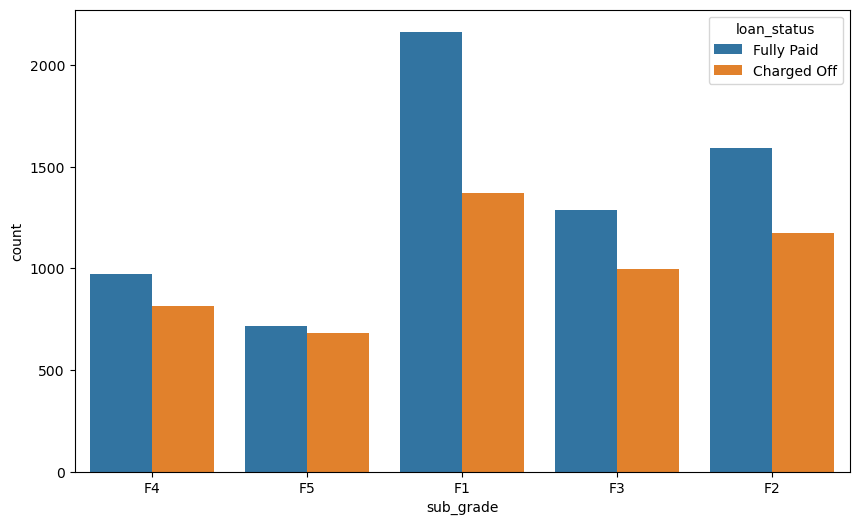

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(df.loc[df['grade']=='F'],x='sub_grade',hue='loan_status')

<Axes: xlabel='earliest_cr_line', ylabel='count'>

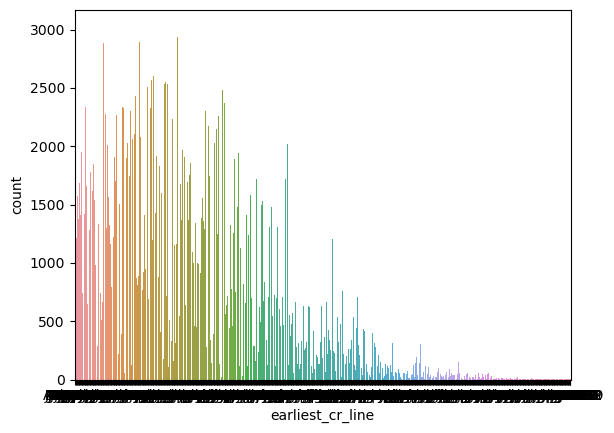

In [124]:
sns.countplot(df,x='earliest_cr_line')

This plot indicates that people who lend money tend to have earlier dates of cr line.

## Data Preprocessing

In this section, we would process the data to make it fit for inputting into machine learning models. We would eradicate Series' which are redundant, and normalize and scale data.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

We dont need emp_title,emp_length,issue_d,title,address,grade columns

In [126]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [127]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

Essentially title and purpose are the same

In [128]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [27]:
df['application_type'].nunique()

3

In [129]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

We would need a function to fetch the **pincode** from the **address** column. The pincode would provide the models with a fair enough idea of the locality the borrower was from.

In [161]:
def get_pincode(name):
    value=name[-1:-6:-1]
    return int(value[-1:-6:-1])

In [162]:
print((get_pincode("0174 Michelle Gateway\nMendozaberg, OK 22690")))

22690


In [166]:
df['pincode']=df['address'].apply(get_pincode)

In [167]:
df.drop(['emp_title','emp_length','title','address','grade','mort_acc'],axis=1,inplace=True)

In [169]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    535
pincode                   0
dtype: int64

Since the number of missing data points is so low in comparison to the total number of data points, we would just drop the rows which have missing data points.

In [170]:
df.dropna(inplace=True)

In [171]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
pincode                 0
dtype: int64

Conversion of the **term** column from objects to integer datatypes.

In [172]:
df['term'].replace({' 36 months':36,' 60 months':60},inplace=True)

In [173]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

Conversion of the label column to 0 or 1 values

In [174]:
df['loan_status'].replace({'Fully Paid':1,'Charged Off':0},inplace=True)

In [175]:
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 395219, dtype: int64

In [176]:
df['purpose'].nunique()

14

In [177]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [178]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

/var/folders/dz/kpczj4916s10t8_7tqcqv9n40000gp/T/ipykernel_5187/2871473801.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])


A function to get the year and month values from a date-time object.

In [273]:
def get_year(date):
    return date.year
def get_month(date):
    return date.month

In [180]:
df['earliest_cr_line_year']=df['earliest_cr_line'].apply(get_year)

In [182]:
df['earliest_cr_line_month']=df['earliest_cr_line'].apply(get_month)

In [184]:
df.drop('earliest_cr_line',inplace=True,axis=1)

In [185]:
df['issue_d']=pd.to_datetime(df['issue_d'])

/var/folders/dz/kpczj4916s10t8_7tqcqv9n40000gp/T/ipykernel_5187/2341729828.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d']=pd.to_datetime(df['issue_d'])


In [186]:
df['issue_d']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 395219, dtype: datetime64[ns]

In [187]:
df['issue_d_year']=df['issue_d'].apply(get_year)

In [188]:
df['issue_d_month']=df['issue_d'].apply(get_month)

In [191]:
df.drop('issue_d',inplace=True,axis=1)

KeyError: "['issue_d'] not found in axis"

Eradication of the fields which had lesser than 0.1% entries out of the total batch.

In [193]:
df['home_ownership']

0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
396029        RENT
Name: home_ownership, Length: 395219, dtype: object

In [200]:
df_copy=df.loc[(df['home_ownership']!='OTHER' )&(df['home_ownership']!='NONE') &(df['home_ownership']!='ANY') ]

In [209]:
df=df_copy

In [210]:
df['verification_status'].nunique()

3

**We convert the fields having objects into dummy variables using One - Hot encoding**

In [213]:
object_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for object columns
dummy_columns = pd.get_dummies(df[object_columns], drop_first=True)

# Replace original object columns with dummy columns
df = pd.concat([df.drop(object_columns, axis=1), dummy_columns], axis=1)


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395077 entries, 0 to 396029
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395077 non-null  float64
 1   term                                 395077 non-null  int64  
 2   int_rate                             395077 non-null  float64
 3   installment                          395077 non-null  float64
 4   annual_inc                           395077 non-null  float64
 5   loan_status                          395077 non-null  int64  
 6   dti                                  395077 non-null  float64
 7   open_acc                             395077 non-null  float64
 8   pub_rec                              395077 non-null  float64
 9   revol_bal                            395077 non-null  float64
 10  revol_util                           395077 non-null  float64
 11  total_acc         

## Train Test Split

Division of the dataset into training and testing sets.

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X=df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling and Normalizing

Scaling and normalizing is done to reduce the computational pressure on the models for processing large inputs.

In [219]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler=MinMaxScaler()

In [222]:
X_train=scaler.fit_transform(X_train)

In [224]:
X_test=scaler.transform(X_test)

## Training a Neural Network model

In [246]:
from tensorflow.keras.models import Sequential

In [247]:
from tensorflow.keras.layers import Dense, Dropout

In [248]:
from tensorflow.keras.callbacks import EarlyStopping

In [249]:
X_train.shape

(316061, 71)

We have a dataframe with 71 rows, therefore the input layer must also accept all these inputs in the networks first layer of neurons.

In [250]:
early_stop=EarlyStopping(mode='min',monitor='val_loss',patience=10)

**EarlyStopping** callback object has been created to prevent overfitting to the training data.

In [251]:
model=Sequential()

model.add(Dense(71,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [252]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=35,callbacks=[early_stop])

Epoch 1/35
9877/9877 [==============================] - 6s 559us/step - loss: 0.3894 - val_loss: 0.3636
Epoch 2/35
9877/9877 [==============================] - 5s 549us/step - loss: 0.3507 - val_loss: 0.2967
Epoch 3/35
9877/9877 [==============================] - 5s 551us/step - loss: 0.2959 - val_loss: 0.2818
Epoch 4/35
9877/9877 [==============================] - 5s 549us/step - loss: 0.2895 - val_loss: 0.2839
Epoch 5/35
9877/9877 [==============================] - 5s 551us/step - loss: 0.2878 - val_loss: 0.2823
Epoch 6/35
9877/9877 [==============================] - 5s 551us/step - loss: 0.2869 - val_loss: 0.2808
Epoch 7/35
9877/9877 [==============================] - 5s 550us/step - loss: 0.2858 - val_loss: 0.2792
Epoch 8/35
9877/9877 [==============================] - 5s 544us/step - loss: 0.2850 - val_loss: 0.2808
Epoch 9/35
9877/9877 [==============================] - 5s 540us/step - loss: 0.2843 - val_loss: 0.2803
Epoch 10/35
9877/9877 [==============================] - 5s 543u

<Axes: >

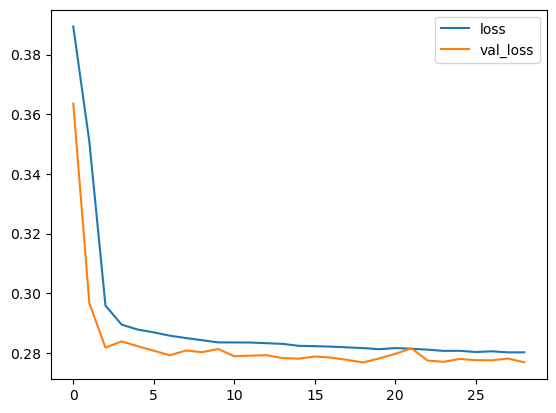

In [253]:
losses=pd.DataFrame(model.history.history)
losses.plot()

**A near perfect loss and val_loss graph!**

## Model Evaluation

In [254]:
from sklearn.metrics import classification_report,confusion_matrix

In [255]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2470/2470 [==============================] - 1s 251us/step


In [256]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6762  8794]
 [   63 63397]]


              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15556
           1       0.88      1.00      0.93     63460

    accuracy                           0.89     79016
   macro avg       0.93      0.72      0.77     79016
weighted avg       0.90      0.89      0.87     79016



Hence we get accuracy of around 90%, recall of around 89% and f1-score of around 87%, which are pretty good scores!

## Predicting loan payment of a random customer

This section would focus on just picking up any random previous customer and checking whether our model would allow him/her to get the loan, and the model prediction would be checked by real life data.

In [258]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt                       8000.0
term                                36
int_rate                         18.24
installment                     290.19
annual_inc                     38000.0
                                ...   
purpose_vacation                 False
purpose_wedding                  False
initial_list_status_w            False
application_type_INDIVIDUAL       True
application_type_JOINT           False
Name: 305422, Length: 71, dtype: object

In [267]:
predict = (model.predict(new_customer.values.reshape(1, 71).astype('float32')) > 0.5).astype("int32")


1/1 [==============================] - 0s 59ms/step


In [268]:
predict.

array([[1]], dtype=int32)

In [270]:
df['loan_status'].iloc[random_ind]

1

Our model works pretty fine! Hence we were succesful in training a Deep Learning model to predict repayment of loans for a lending organisation. Thanks!

# End